# **Some blocks to use**

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<class 'pandas.core.frame.DataFrame'>
     Step  replication/seed  total_adapted_households  \
0       0               4.5                       9.0   
1       1               4.5                      10.8   
2       2               4.5                      12.4   
3       3               4.5                      14.0   
4       4               4.5                      15.2   
..    ...               ...                       ...   
395   395               4.5                     143.6   
396   396               4.5                     143.5   
397   397               4.5                     143.6   
398   398               4.5                     143.7   
399   399               4.5                     144.1   

     total_dryproofed_households  total_wetproofed_households  \
0                            3.2                          5.8   
1                            3.8                          7.0   
2                            4.4                          8.0   
3                

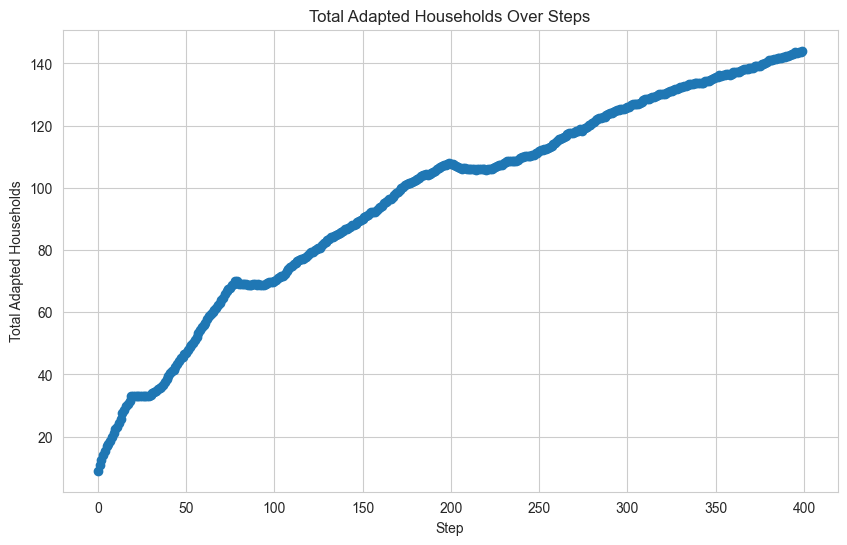

In [4]:
# upload the data with the following code
# change the file name to the file you want to load
model_dataframe_initial = pd.read_csv(f"../results/{'model_results_no_subsidy'}.csv")
agent_dataframe_initial = pd.read_csv(f"../results/{'agent_results_no_subsidy'}.csv")
print(type(model_dataframe_initial))

# Group by the "step" column and calculate the mean of "total_adapted_households" and "replication/seed"
grouped_data = model_dataframe_initial.groupby('Step').agg('mean').reset_index()

# The grouped_data DataFrame now contains the average values for each unique "step" value
print(grouped_data)


# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['Step'], grouped_data['total_adapted_households'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Step')
plt.ylabel('Total Adapted Households')
plt.title('Total Adapted Households Over Steps')

# Show the grid
plt.grid(True)

# Display the chart
plt.show()

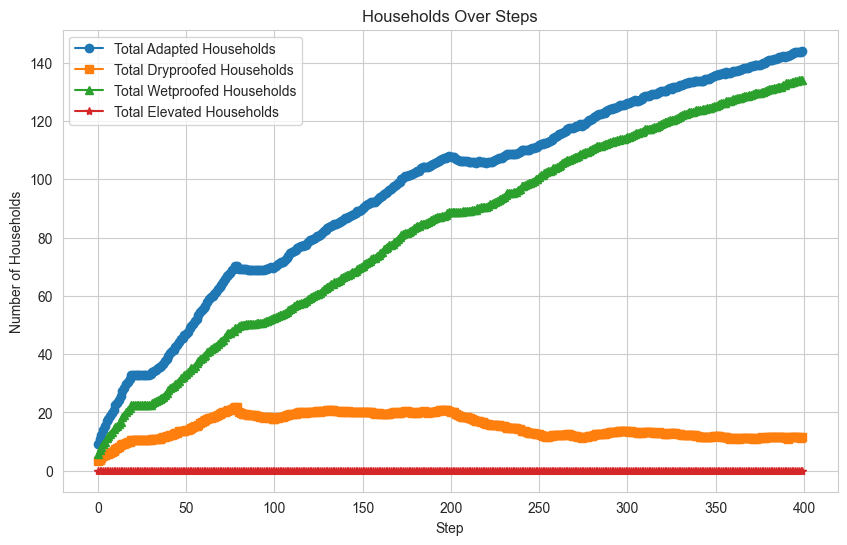

In [5]:
# Create the line chart with multiple lines
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['Step'], grouped_data['total_adapted_households'], label='Total Adapted Households', marker='o', linestyle='-')
plt.plot(grouped_data['Step'], grouped_data['total_dryproofed_households'], label='Total Dryproofed Households', marker='s', linestyle='-')
plt.plot(grouped_data['Step'], grouped_data['total_wetproofed_households'], label='Total Wetproofed Households', marker='^', linestyle='-')
plt.plot(grouped_data['Step'], grouped_data['total_elevated_households'], label='Total Elevated Households', marker='*', linestyle='-')

# Add labels and title
plt.xlabel('Step')
plt.ylabel('Number of Households')
plt.title('Households Over Steps')

# Show the legend
plt.legend()

# Show the grid
plt.grid(True)

# Display the chart
plt.show()

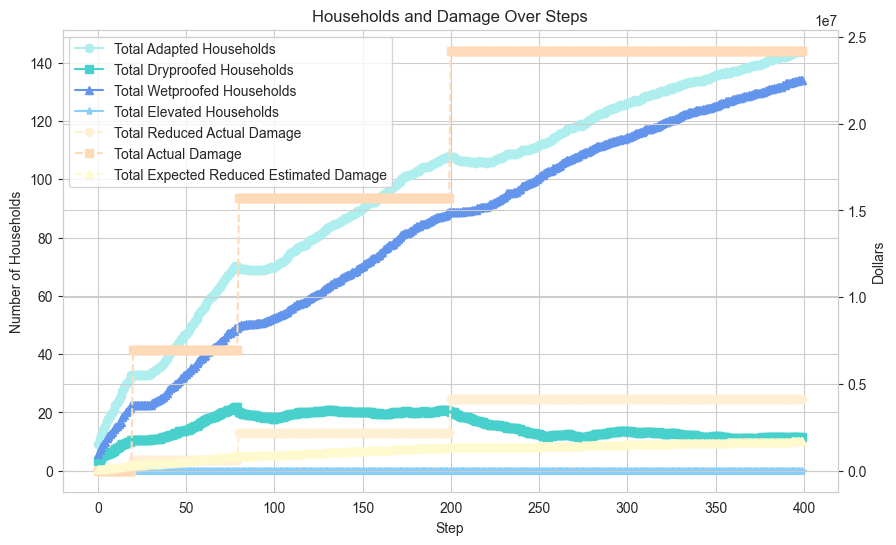

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the grouped_data DataFrame from previous code

# Define warm and cold colors
warm_colors = ['PapayaWhip', 'PeachPuff', 'LemonChiffon']
cold_colors = ['PaleTurquoise', 'MediumTurquoise', 'CornflowerBlue', 'LightSkyBlue']

# Create the line chart with dual Y-axes and custom colors
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Lines on the left Y-axis (number of households) with cold colors
ax1.plot(grouped_data['Step'], grouped_data['total_adapted_households'], label='Total Adapted Households', marker='o', linestyle='-', color=cold_colors[0])
ax1.plot(grouped_data['Step'], grouped_data['total_dryproofed_households'], label='Total Dryproofed Households', marker='s', linestyle='-', color=cold_colors[1])
ax1.plot(grouped_data['Step'], grouped_data['total_wetproofed_households'], label='Total Wetproofed Households', marker='^', linestyle='-', color=cold_colors[2])
ax1.plot(grouped_data['Step'], grouped_data['total_elevated_households'], label='Total Elevated Households', marker='*', linestyle='-', color=cold_colors[3])

# Lines on the right Y-axis (in dollars) with warm colors
ax2.plot(grouped_data['Step'], grouped_data['total_reduced_actual_damage'], label='Total Reduced Actual Damage', marker='o', linestyle='--', color=warm_colors[0])
ax2.plot(grouped_data['Step'], grouped_data['total_actual_damage'], label='Total Actual Damage', marker='s', linestyle='--', color=warm_colors[1])
ax2.plot(grouped_data['Step'], grouped_data['total_expected_reduced_estimated_damage'], label='Total Expected Reduced Estimated Damage', marker='^', linestyle='--', color=warm_colors[2])

# Add labels and title
ax1.set_xlabel('Step')
ax1.set_ylabel('Number of Households')
ax2.set_ylabel('Dollars')
plt.title('Households and Damage Over Steps')

# Show the legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
plt.legend(lines, labels)

# Show the grid
ax1.grid(True)

# Display the chart
plt.show()

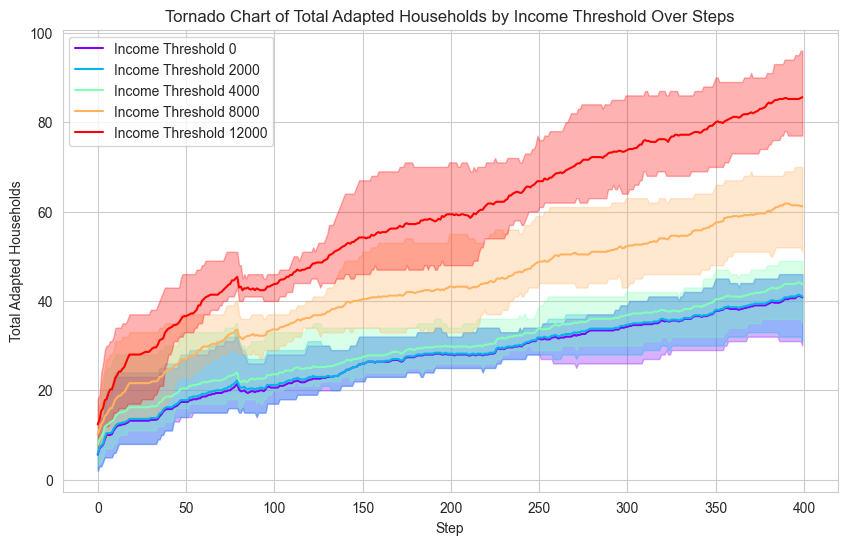

In [3]:
model_dataframe_income_threshold = pd.read_csv(f"../result_extremevalue/{'model_sensitivity_results_income_threshold'}.csv")
# Group by 'Step' and 'income_threshold', then calculate the mean, min, and max for 'total_adapted_households'
grouped = model_dataframe_income_threshold.groupby(['Step', 'income_threshold'])['total_adapted_households'].agg(['mean', 'min', 'max']).reset_index()

# Get unique income_threshold values for color differentiation
income_thresholds = grouped['income_threshold'].unique()

# Create a color map to assign different colors for each income_threshold
color_map = plt.cm.rainbow(np.linspace(0, 1, len(income_thresholds)))

plt.figure(figsize=(10, 6))

# Plot each income_threshold in different colors
for income_threshold, color in zip(income_thresholds, color_map):
    # Subset the DataFrame for the current income_threshold
    subset = grouped[grouped['income_threshold'] == income_threshold]

    # Plot the mean line for total_adapted_households
    plt.plot(subset['Step'], subset['mean'], label=f'Income Threshold {income_threshold}', color=color)

    # Create the shadow area for the same income_threshold
    plt.fill_between(subset['Step'], subset['min'], subset['max'], alpha=0.3, color=color)

plt.xlabel('Step')
plt.ylabel('Total Adapted Households')
plt.title('Tornado Chart of Total Adapted Households by Income Threshold Over Steps')
plt.legend()
plt.show()

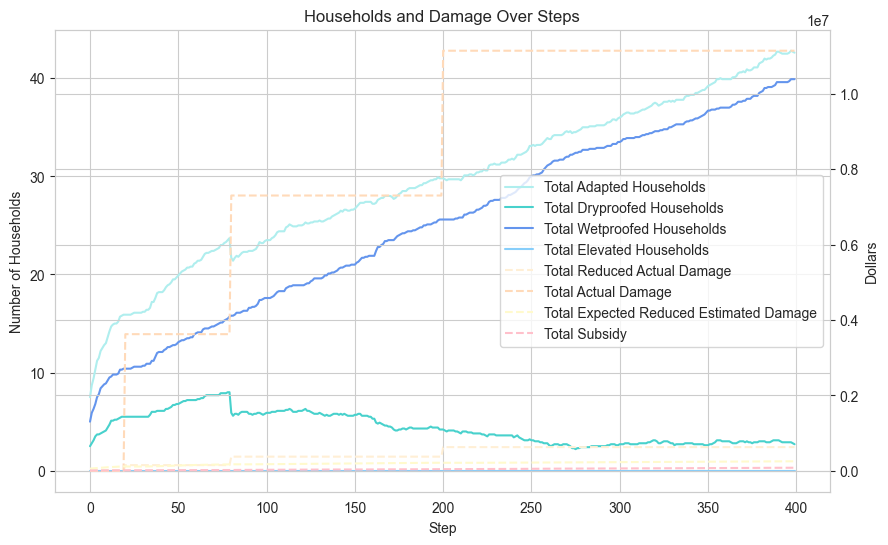

In [4]:
# upload the data with the following code
model_dataframe_initial = pd.read_csv(f"../result_sensitivity/{'model_results_initial'}.csv")

grouped_data = model_dataframe_initial.groupby('Step').agg('mean').reset_index()
# Define warm and cold colors
warm_colors = ['PapayaWhip', 'PeachPuff', 'LemonChiffon', 'Pink']
cold_colors = ['PaleTurquoise', 'MediumTurquoise', 'CornflowerBlue', 'LightSkyBlue']

# Create the line chart with dual Y-axes and custom colors
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Lines on the left Y-axis (number of households) with cold colors
ax1.plot(grouped_data['Step'], grouped_data['total_adapted_households'], label='Total Adapted Households', linestyle='-', color=cold_colors[0])
ax1.plot(grouped_data['Step'], grouped_data['total_dryproofed_households'], label='Total Dryproofed Households', linestyle='-', color=cold_colors[1])
ax1.plot(grouped_data['Step'], grouped_data['total_wetproofed_households'], label='Total Wetproofed Households', linestyle='-', color=cold_colors[2])
ax1.plot(grouped_data['Step'], grouped_data['total_elevated_households'], label='Total Elevated Households', linestyle='-', color=cold_colors[3])

# Lines on the right Y-axis (in dollars) with warm colors
ax2.plot(grouped_data['Step'], grouped_data['total_reduced_actual_damage'], label='Total Reduced Actual Damage', linestyle='--', color=warm_colors[0])
ax2.plot(grouped_data['Step'], grouped_data['total_actual_damage'], label='Total Actual Damage', linestyle='--', color=warm_colors[1])
ax2.plot(grouped_data['Step'], grouped_data['total_expected_reduced_estimated_damage'], label='Total Expected Reduced Estimated Damage', linestyle='--', color=warm_colors[2])
ax2.plot(grouped_data['Step'], grouped_data['total_subsidy'], label='Total Subsidy', linestyle='--', color=warm_colors[3])

# Add labels and title
ax1.set_xlabel('Step')
ax1.set_ylabel('Number of Households')
ax2.set_ylabel('Dollars')
plt.title('Households and Damage Over Steps')

# Show the legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
plt.legend(lines, labels)

# Show the grid
ax1.grid(True)

# Display the chart
plt.show()

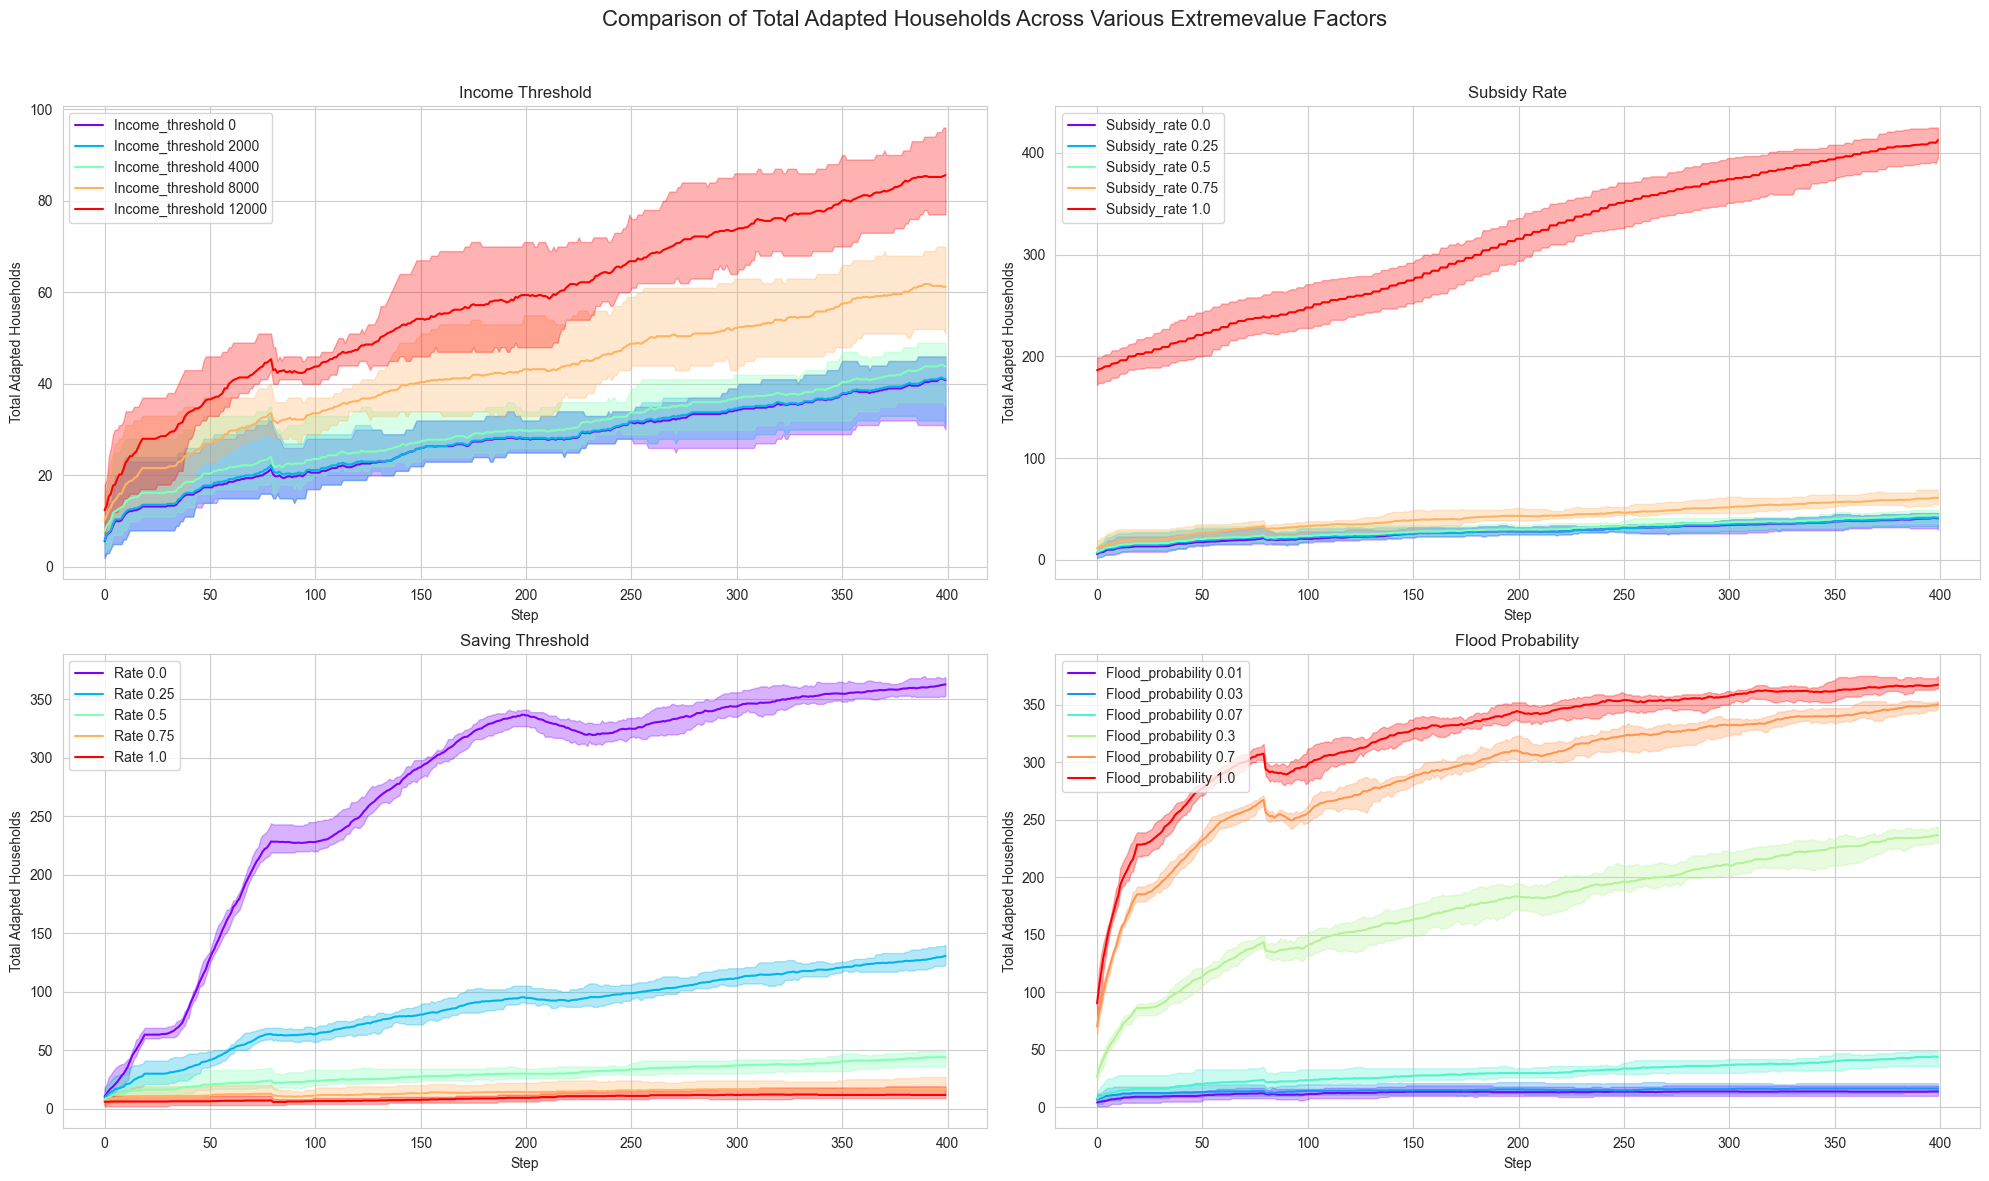

In [5]:
def group_data(df, group_column):
    return df.groupby(['Step', group_column])['total_adapted_households'].agg(['mean', 'min', 'max']).reset_index()

def plot_data(grouped, group_column, ax, title):
    unique_values = grouped[group_column].unique()
    color_map = plt.cm.rainbow(np.linspace(0, 1, len(unique_values)))

    for value, color in zip(unique_values, color_map):
        subset = grouped[grouped[group_column] == value]
        ax.plot(subset['Step'], subset['mean'], label=f'{group_column.capitalize()} {value}', color=color)
        ax.fill_between(subset['Step'], subset['min'], subset['max'], alpha=0.3, color=color)

    ax.set_xlabel('Step')
    ax.set_ylabel('Total Adapted Households')
    ax.set_title(title)
    ax.legend()

# Read dataframes
model_dataframe_income_threshold = pd.read_csv("../result_extremevalue/model_sensitivity_results_income_threshold.csv")
model_dataframe_subsidy_rate = pd.read_csv("../result_extremevalue/model_sensitivity_results_subsidy_rate.csv")
model_dataframe_saving_threshold = pd.read_csv("../result_extremevalue/model_sensitivity_results_saving_threshold.csv")
model_dataframe_flood_prob = pd.read_csv("../result_extremevalue/model_sensitivity_results_flood_prob.csv")

# Group data
grouped_income = group_data(model_dataframe_income_threshold, 'income_threshold')
grouped_subsidy = group_data(model_dataframe_subsidy_rate, 'subsidy_rate')
grouped_saving = group_data(model_dataframe_saving_threshold, 'rate')
grouped_flood = group_data(model_dataframe_flood_prob, 'flood_probability')

# Create figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 12)) # Adjust the number of rows and columns as needed

# Plot data
plot_data(grouped_income, 'income_threshold', axs[0, 0], 'Income Threshold')
plot_data(grouped_subsidy, 'subsidy_rate', axs[0, 1], 'Subsidy Rate')
plot_data(grouped_saving, 'rate', axs[1, 0], 'Saving Threshold')
plot_data(grouped_flood, 'flood_probability', axs[1, 1], 'Flood Probability')

# Set the title for the entire figure
fig.suptitle('Comparison of Total Adapted Households Across Various Extremevalue Factors', fontsize=16)

plt.tight_layout()
fig.subplots_adjust(top=0.9) # Adjust the top spacing to accommodate the figure title
plt.show()

In [1]:
# Define the file paths and parameters
file_paths = {
    "income_threshold": "../result_sensitivity/model_sensitivity_results_income_threshold.csv",
    "saving_threshold": "../result_sensitivity/model_sensitivity_results_saving_threshold.csv",
    "subsidy_rate": "../result_sensitivity/model_sensitivity_results_subsidy_rate.csv",
    "flood_prob": "../result_sensitivity/model_sensitivity_results_flood_prob.csv"
}

parameter_column_names = {
    "income_threshold": "income_threshold",
    "saving_threshold": "rate",
    "subsidy_rate": "subsidy_rate",
    "flood_prob": "flood_probability"
}

parameters = {
    "income_threshold": [3600, 4000, 4400],
    "saving_threshold": [0.45, 0.5, 0.55],
    "subsidy_rate": [0.45, 0.5, 0.55],
    "flood_prob": [0.063, 0.07, 0.077]
}
# **Single Parameter Sensitivity Analysis**
# Initialize a dictionary to store all results
data_TAH = {}

# Loop through each DataFrame and calculate statistics
for key, file_path in file_paths.items():
    df = load_and_filter_dataframe(file_path)
    parameter_name = parameter_column_names[key]
    statistics = calculate_statistics(df, 'total_adapted_households', parameter_name, parameters[key])
    data_TAH[key] = statistics

# Now 'data_TAH' contains all the results in the desired format
print(data_TAH)

# Define new colors and labels
colors = ['#e79063', 'black', '#9edcd8']  # Colors for decrease 10%, original, and increase 10% respectively
scenario_labels = ['Decrease 10%', 'Original', 'Increase 10%']

# Create the dot-whisker chart
fig, ax = plt.subplots(figsize=(12, 8))
offset = 0.1  # Offset for scenarios from the central axis
whisker_width = 4  # Width of the whisker lines

# Plot each set of points with a different color and slightly offset on the X axis
for i, (variable, scenarios) in enumerate(data_TAH.items()):
    position = i  # Central position for the group of scenarios for each variable
    for j, (level, values) in enumerate(scenarios.items()):
        scenario_offset = (j - 1) * offset
        median_value = np.median(values)
        min_value = np.min(values)
        max_value = np.max(values)

        # Draw the whisker line
        ax.plot([position + scenario_offset] * 2, [min_value, max_value], '-', color=colors[j], linewidth=whisker_width)

        # Draw the median dot
        ax.plot(position + scenario_offset, median_value, 'o', color=colors[j], markersize=10)

# Group lines visually with vertical lines or shading
for i in range(len(data_TAH)):
    ax.axvline(x=i, color='grey', linestyle='--', linewidth=0.5, alpha=0.7)

# Set the labels for the x-ticks and position them
ax.set_xticks(range(len(data_TAH)))
ax.set_xticklabels([variable for variable in data_TAH.keys()], rotation=0)

# Set the axis labels and title
ax.set_ylabel('Total_adapted_households')
ax.set_title('Sensitivity Analysis for KPI - Total Adapted Households')

# Add a custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for
                   color, label in zip(colors, scenario_labels)]
ax.legend(handles=legend_elements, title='Scenario')

# Grid and layout settings
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()


NameError: name 'load_and_filter_dataframe' is not defined

In [ ]:
def group_data(df, group_column, kpi_column):
    return df.groupby(['Step', group_column])[kpi_column].agg(['mean', 'min', 'max']).reset_index()

def plot_data(grouped, group_column, ylabel, ax, title):
    unique_values = grouped[group_column].unique()
    color_map = plt.cm.rainbow(np.linspace(0, 1, len(unique_values)))

    for value, color in zip(unique_values, color_map):
        subset = grouped[grouped[group_column] == value]
        ax.plot(subset['Step'], subset['mean'], label=f'{group_column.capitalize()} {value}', color=color)
        ax.fill_between(subset['Step'], subset['min'], subset['max'], alpha=0.3, color=color)

    ax.set_xlabel('Step')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()

def analyze_kpi(kpi_column):
    # Read dataframes
    dataframes = {
        "income_threshold": pd.read_csv("../result_extremevalue/model_sensitivity_results_income_threshold.csv"),
        "subsidy_rate": pd.read_csv("../result_extremevalue/model_sensitivity_results_subsidy_rate.csv"),
        "rate": pd.read_csv("../result_extremevalue/model_sensitivity_results_saving_threshold.csv"),
        "flood_probability": pd.read_csv("../result_extremevalue/model_sensitivity_results_flood_prob.csv")
    }

    # Group data
    grouped_data = {key: group_data(df, key, kpi_column) for key, df in dataframes.items()}

    # Create figure and subplots
    fig, axs = plt.subplots(2, 2, figsize=(20, 12))  # Adjust as needed

    # Plot data
    plot_data(grouped_data["income_threshold"], 'income_threshold', kpi_column, axs[0, 0], 'Income Threshold')
    plot_data(grouped_data["subsidy_rate"], 'subsidy_rate', kpi_column, axs[0, 1], 'Subsidy Rate')
    plot_data(grouped_data["rate"], 'rate', kpi_column, axs[1, 0], 'Saving Threshold')
    plot_data(grouped_data["flood_probability"], 'flood_probability', kpi_column, axs[1, 1], 'Flood Probability')

    # Set the title for the entire figure
    fig.suptitle(f'Comparison of {kpi_column} Across Various Extremevalue Factors', fontsize=16)

    plt.tight_layout()
    fig.subplots_adjust(top=0.9)
    plt.show()